In [1]:
from HistoryMatching.ReadFiles import ReadObsFile
from HistoryMatching.Utils import CVAE_function,GetFaciesData,Plot_Result,Contitional_ES_MDA
from HistoryMatching.Utils import Load_Ensemble,GerenateObsFile,CreateStateFacies,UpdateStateFacies
from Model.Utils import MPS_Generator
import numpy as np

Using TensorFlow backend.
W0306 19:44:30.881586 140449885378368 deprecation_wrapper.py:119] From /share/GeoFacies/GeoFacies_DL/Model/Utils.py:238: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.



# Load Ensemble Data

In [2]:
generator = MPS_Generator('DataSet/MPS45/test_val.tfrecords',200)
Facies = generator.get_numpy_batch()
Facies=np.argmax(Facies,axis=-1).reshape((200,45*45)).T

W0306 19:44:30.964088 140449885378368 deprecation_wrapper.py:119] From /share/GeoFacies/GeoFacies_DL/Model/Utils.py:322: The name tf.parse_single_example is deprecated. Please use tf.io.parse_single_example instead.

W0306 19:44:30.965581 140449885378368 deprecation_wrapper.py:119] From /share/GeoFacies/GeoFacies_DL/Model/Utils.py:325: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.

W0306 19:44:30.999653 140449885378368 deprecation.py:323] From /share/GeoFacies/GeoFacies_DL/Model/Utils.py:314: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
W0306 19:44:31.029816 140449885378368 deprecation_wrapper.py:119] From /work/S

# Generate Measurement

In [3]:
GenerateMeasurement=True
import scipy.io as sio
True45 = sio.loadmat('DataSet/True45.mat')
True45 = True45['True']
if GenerateMeasurement:
    ""
    ""
    xp = [2,37,7,33]      # produtor well
    yp = [22,4,42,41]     # produtor well
    xi = [7,24,42]        # injetor well
    yi = [4,14,26]        # injetor well
    position=np.array([yp+yi] + [xp+xi]).T
    obs=GerenateObsFile(position,True45)
    print(obs)

[1, 0, 1, 1, 1, 0, 1]


# Test #1
<ul>
    <li> File utilizado: 'Obs.dat' </li>
        <ul>
            <li> xp = [2,37,7,33] - Poço produtor </li>
            <li> yp = [22,4,42,41] - Poço produtor </li>
            <li> xi = [7,24,42] - Poço injetor </li>
            <li> yi = [4,14,26] - Poço injetor </li>
        </ul>
    </li>
    <li> position = np.array([yp+yi] + [xp+xi]).T </li>
</ul>
    

## Read Observation File

In [4]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs.dat')

## Generate parameterized Facies data

In [5]:
m_x = CreateStateFacies(Facies,45,45,redeVAE='Model/TrainModel/CVAE45'); # facies em DL

W0306 19:44:31.365984 140449885378368 deprecation.py:506] From /work/SmithCPU/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0306 19:44:31.745239 140449885378368 deprecation_wrapper.py:119] From /share/GeoFacies/GeoFacies_DL/Model/BiLinearUp.py:50: The name tf.image.resize_bilinear is deprecated. Please use tf.compat.v1.image.resize_bilinear instead.



## Reconstucted Initial Facies data

In [6]:
m_f = UpdateStateFacies(m_x,45,45,redeVAE='Model/TrainModel/CVAE45')

## Execute ES-MDA for generate Contidional Sampling

In [7]:
m_f_a=Contitional_ES_MDA(6,[],position,obs,R,m_x,m_f,[45,45],redeVAE='Model/TrainModel/CVAE45')

Erro ite_ 0  :  800.0
Erro ite_ 1  :  304.0
Erro ite_ 2  :  100.0
Erro ite_ 3  :  37.0
Erro ite_ 4  :  14.0
Erro ite_ 5  :  8.0
Erro End:  5.0


## Plot True Model and Result

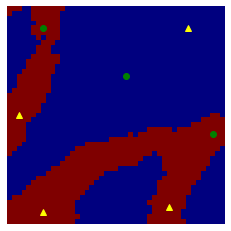

In [8]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True45.reshape((45,45)),cmap='jet')
plt.plot(xp,yp,'^',color='yellow')
plt.plot(xi,yi,'o',color='green')
plt.axis('off')
plt.show()

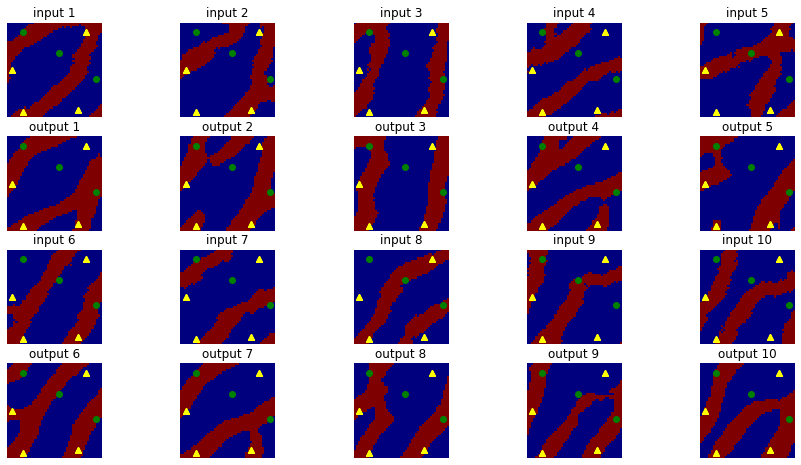

In [9]:
Plot_Result(Facies,m_f_a,xp,yp,xi,yi,initial_data=0) 

# Teste 2

<ul>
    <li> Arquivo utilizado: 'Obs2.dat' </li>
    <li> Pontos utilizados:
        <ul>
            <li> xe = [2,8,18,33,41,44,2,10,26,38,44] </li>
            <li> ye = [40,34,27,23,19,7,15,10,1,40,36] </li>
            <li> xi = [] </li>
            <li> yi = [] </li>
        </ul>
    </li>
    <li> position = np.array([ye] + [xe]).T </li>
</ul>

In [10]:
GenerateMeasurement=True
import scipy.io as sio
True45 = sio.loadmat('DataSet/True45.mat')
True45 = True45['True']
if GenerateMeasurement:
    ""
    ""
    xe=[2,12,22,32,42,2,12,22,32,42,2,12,22,32,42,2,12,22,32,42]
    ye=[3, 3 ,3,3,3,16,16,16,16,16,28,28,28,28,28,42,42,42,42,42]
    #xe = [2, 8, 18,33,41,44,2 ,10,26,38,44]
    #ye = [40,34,30,28,25,7 ,15,10,1 ,40,36]
    position=np.array([ye] + [xe]).T
    obs=GerenateObsFile(position,True45,filePath='Obs2.dat')
    print(obs)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


## Read Observation File

In [11]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs2.dat')

## Generate parameterized Facies data

In [12]:
m_x = CreateStateFacies(Facies,45,45,redeVAE='Model/TrainModel/CVAE45'); # facies em DL

## Reconstucted Initial Facies data


In [13]:
m_f = UpdateStateFacies(m_x,45,45,redeVAE='Model/TrainModel/CVAE45')

## Execute ES-MDA for generate Contidional Sampling

In [14]:
m_f_a=Contitional_ES_MDA(10,[],position,obs,R,m_x,m_f,[45,45],redeVAE='Model/TrainModel/CVAE45')

Erro ite_ 0  :  1856.0
Erro ite_ 1  :  1075.0
Erro ite_ 2  :  674.0
Erro ite_ 3  :  426.0
Erro ite_ 4  :  255.0
Erro ite_ 5  :  151.0
Erro ite_ 6  :  105.0
Erro ite_ 7  :  77.0
Erro ite_ 8  :  53.0
Erro ite_ 9  :  31.0
Erro End:  31.0


## Plot True Model and Result

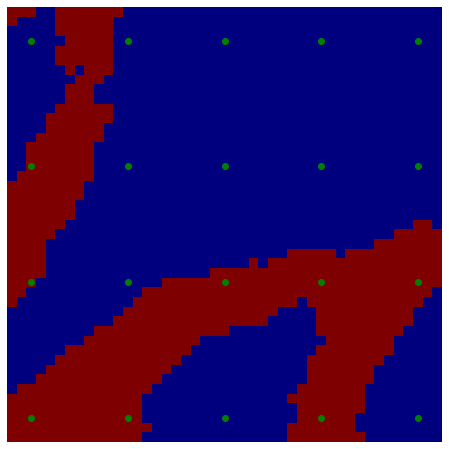

In [15]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True45.reshape((45,45)),cmap='jet')
plt.plot(xe,ye,'o',color='green')
plt.axis('off')
plt.show()

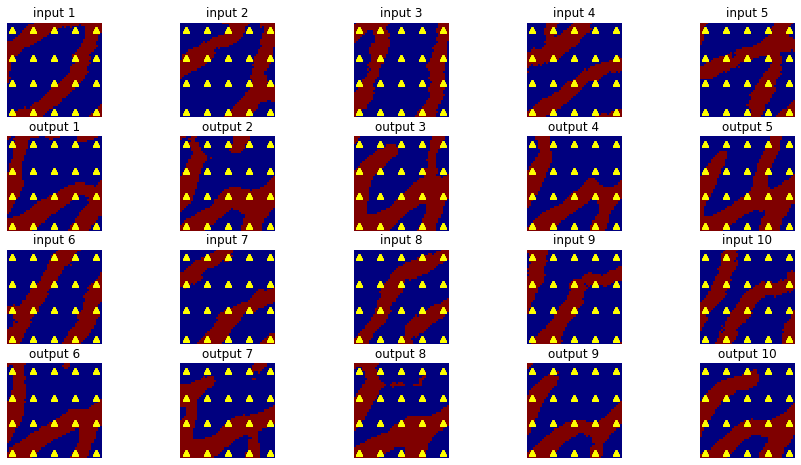

In [16]:
Plot_Result(Facies,m_f_a,xe,ye,[],[],initial_data=0) 

# Generate Random Samples

In [21]:
import numpy as np
z_0=np.random.normal(0,1,size=(100,500))

In [22]:
x_0  = UpdateStateFacies(z_0.T,45,45,redeVAE='Model/TrainModel/CVAE45')
z_i  = z_0
Z    = [x_0]
for i in range(100):  
    dz   = np.random.normal(0,0.01,size=(100,500)) 
    z_i  = z_i + dz   
    x_i  = UpdateStateFacies(z_i.T,45,45,redeVAE='Model/TrainModel/CVAE45')
    Z.append(x_i)

In [23]:
def Plot_Random(facies,m_f_a,initial_data=0,marked='r^',shape=[45,45],sampling=[0,20]):
    plt.rcParams['figure.figsize'] = (15,8)
    fig, axs = plt.subplots(2,5)
    #plt.title(title)
    for i in range(5):
        axs[0,i].imshow(facies[:,i+initial_data].reshape(shape[0],shape[1]), cmap='jet')
        axs[0,i].axis('off')
        axs[0,i].set_title('Sampling: x_%i (%i)'%(sampling[0],i+1))
        axs[1,i].imshow(m_f_a[:,i+initial_data].reshape(shape[0],shape[1]), cmap='jet')        
        axs[1,i].axis('off')
        axs[1,i].set_title('Sampling: x_%i (%i)'%(sampling[1],i+1)) 
    plt.show()

In [26]:
def plot_imagens(Z,index,num=5,shape=[45,45]):
    plt.rcParams['figure.figsize'] = (15,8)
    aux = Z[index]    
    for i in range(num):
        plt.imshow(aux[:,i].reshape(shape[0],shape[1]),cmap='jet')
        plt.axis('off')
        plt.show()

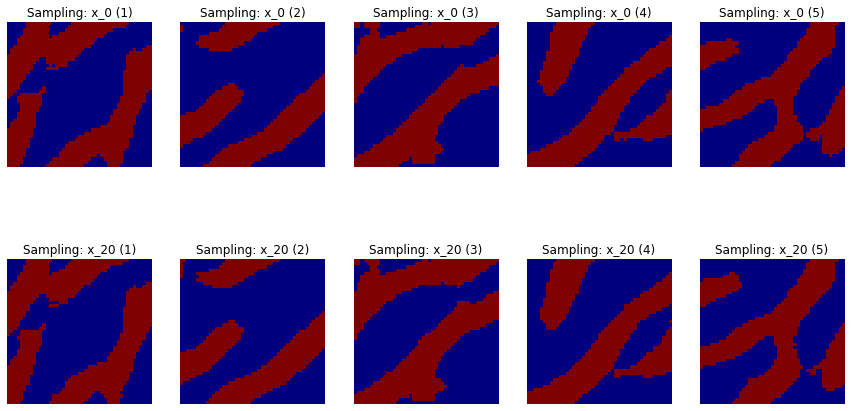

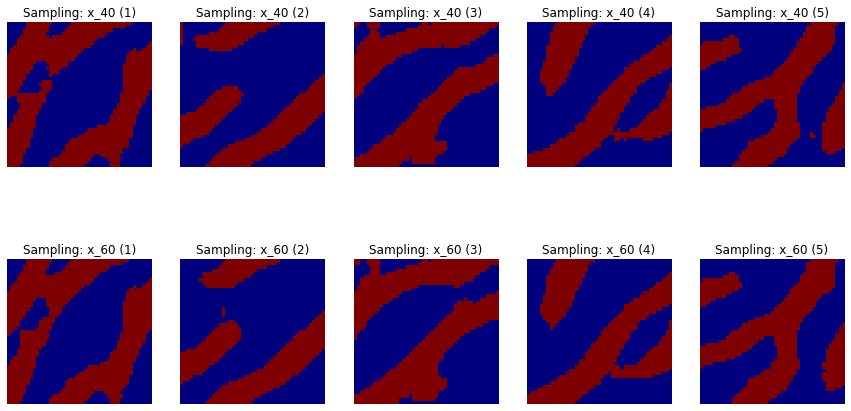

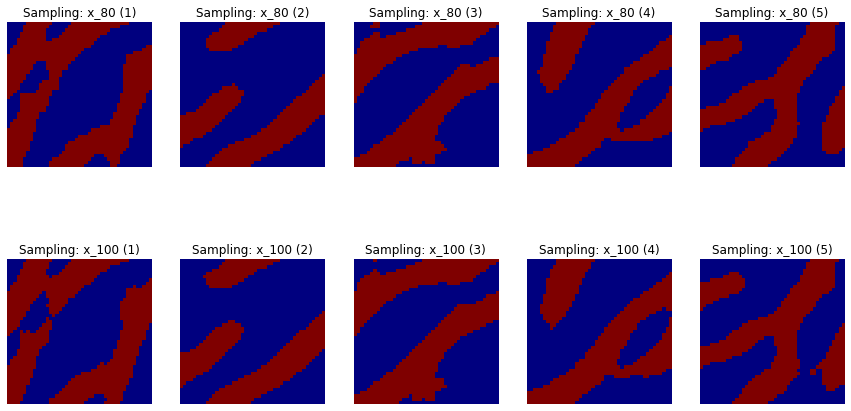

In [28]:
Plot_Random(Z[0],Z[20],initial_data=0,sampling=[0,20])
Plot_Random(Z[40],Z[60],initial_data=0,sampling=[40,60])
Plot_Random(Z[80],Z[100],initial_data=0,sampling=[80,100]) 